<a href="https://colab.research.google.com/github/asheta66/Machine-Learning-2022/blob/main/Multiple%20Linear%20Regression/MLR_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
# Simple Linear Regression
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#import pandas as pd
#con = pd.read_csv('Data/ConcreteStrength.csv')
#con

# Importing the datasets
import sklearn.datasets
Salary_data = pd.read_csv("https://raw.githubusercontent.com/asheta66/Machine-Learning-2022/main/Simple%20Linear%20Regression/Salary_Data.csv")
X = Salary_data.iloc[:,:-1].values
y = Salary_data.iloc[:,1].values
Salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [177]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [178]:
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

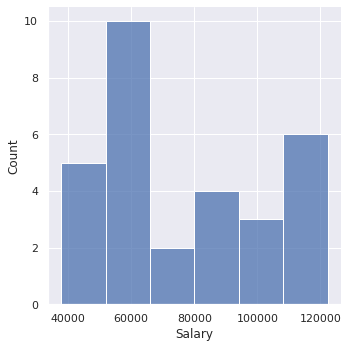

In [179]:
sns.displot(data=Salary_data, x="Salary")

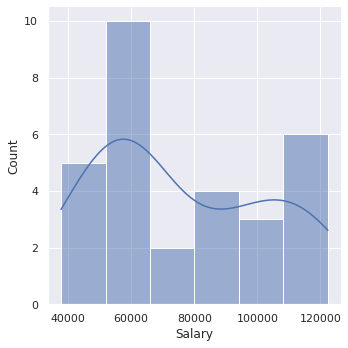

In [180]:
sns.displot(data=Salary_data, x="Salary", kde=True)

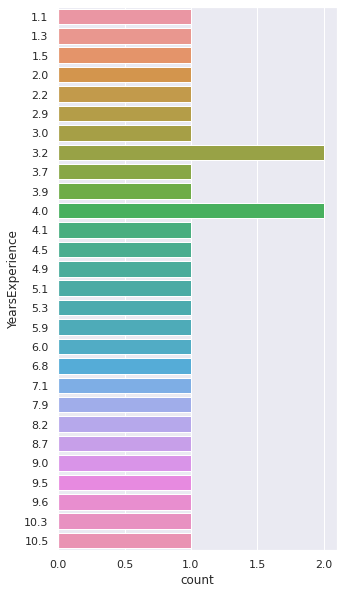

In [181]:
sns.set(rc={"figure.figsize":(5, 10)}) #width=8, height=4
sns.countplot(data=Salary_data, y="YearsExperience")

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '29')]

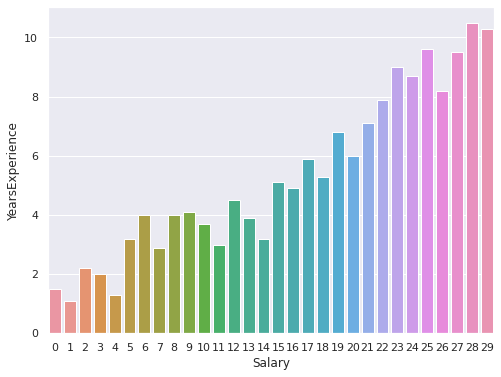

In [182]:
sns.set(rc={"figure.figsize":(8, 6)}) #width=8, height=4
sns.barplot(data=Salary_data, y="YearsExperience", x="Salary")

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

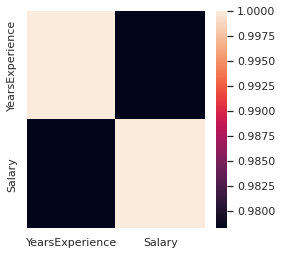

In [183]:
sns.set(rc={"figure.figsize":(4, 4)}) 
sns.heatmap(Salary_data.corr())

In [184]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [185]:
# Fitting Simple Linear Regression to the training set
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [186]:
# Predicting the Test set result ￼
y_pred_train = lr.predict(X_train)
y_pred_test  = lr.predict(X_test)

In [187]:
# Showing the model parameters which include the interecpt (a0) and the rest of model paremeters
lr.score(X_train, y_train)
print('Showing the developed LR model parameters')
print(f"a0={lr.intercept_} and a1={lr.coef_}")

Showing the developed LR model parameters
a0=26780.09915062818 and a1=[9312.57512673]


In [188]:
# Calculating Performance Criteria
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

mse1 = mean_squared_error(y_train, y_pred_train)
mse2 = mean_squared_error(y_test, y_pred_test)

mae1 = mean_absolute_error(y_train, y_pred_train)
mae2 = mean_absolute_error(y_test, y_pred_test)

vs1 = explained_variance_score(y_train, y_pred_train)
vs2 = explained_variance_score(y_test, y_pred_test)

print('mean_squared_error_train (MSE):', format(mse1,".5f"), '    ', 'mean_squared_error_test (MSE):', format(mse2,".5f"),)
print('mean_absolute_error_train (MAE):', format(mae1,".5f"), '    ', 'mean_absolute_error_test (MAE):', format(mae2,".5f"),)
print('Variance_score_train (VarScore):', format(vs1,".5f"), '    ', 'Variance_score_test (VarScore):', format(vs2,".5f"),)


mean_squared_error_train (MSE): 36149670.11816      mean_squared_error_test (MSE): 12823412.29813
mean_absolute_error_train (MAE): 5221.07855      mean_absolute_error_test (MAE): 2446.17237
Variance_score_train (VarScore): 0.94119      Variance_score_test (VarScore): 0.98970


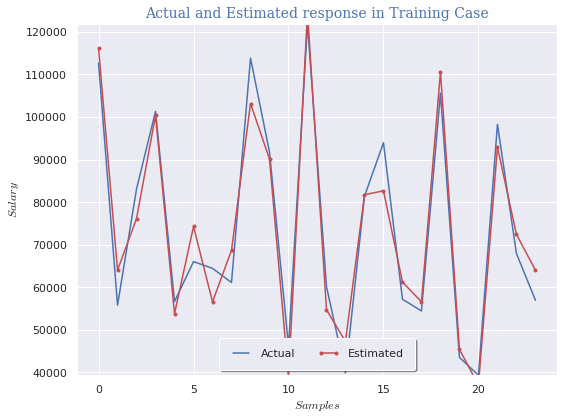

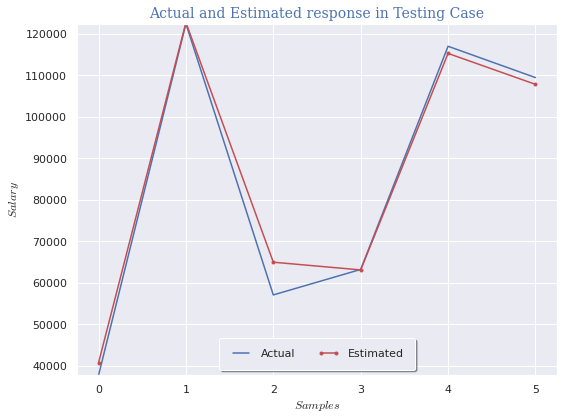

In [189]:
# Drawing the actual and estimated responses

fig, axs = plt.subplots(figsize=(8, 6), tight_layout=True)

plt.plot(y_train, '-b', label='Actual')
plt.plot(y_pred_train, '.-r', label='Estimated')

plt.xlabel(r'$ Samples $', fontsize=12)
plt.ylabel(r'$ Salary $', fontsize=12)

plt.title(r'Actual and Estimated response in Training Case', fontname= 'serif',fontsize=14, color='b')
plt.ylim(np.min(y_train)-10, np.max(y_train)+10)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='lower center', ncol=2)
plt.grid(True)
plt.show()

fig, axs = plt.subplots(figsize=(8, 6), tight_layout=True)
plt.plot(y_test, '-b', label='Actual')
plt.plot(y_pred_test, '.-r', label='Estimated')
plt.xlabel(r'$ Samples $', fontsize=12)
plt.ylabel(r'$ Salary $', fontsize=12)
plt.title(r'Actual and Estimated response in Testing Case', fontname= 'serif',fontsize=14, color='b')
plt.ylim(np.min(y_test)-10, np.max(y_test)+10)
plt.grid(True)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, frameon=True, loc='lower center', ncol=2)
plt.savefig(r'C:\Users\Admin\Desktop\Data Science Class\Simple_Linear_Regression\Actual_Estimated.png')
plt.show()

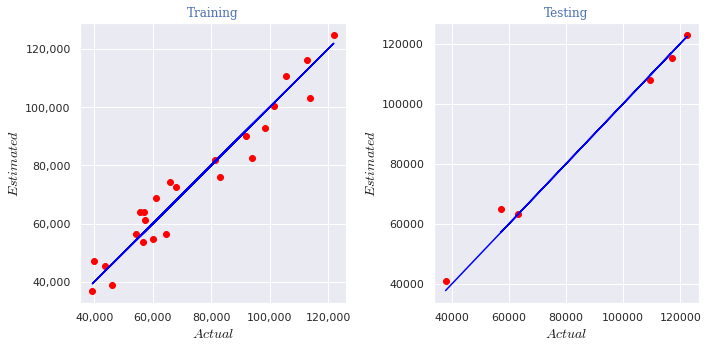

In [190]:
# drawing Scatterplots
fig, axs = plt.subplots(figsize=(10, 5), tight_layout=True)

ax1 = plt.subplot(121)
ax1.plot(y_train, y_train, color = 'blue')
ax1.scatter(y_train, y_pred_train, color = 'red')
plt.xlabel(r'$ Actual $', fontname= 'serif',fontsize=14, color='k')
plt.ylabel(r'$ Estimated $', fontname= 'serif',fontsize=14, color='k')
plt.title(r'Training', fontname= 'serif',fontsize=12, color='b')
ax1.grid(True)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

#ax1.plt.savefig(r'C:\Users\Admin\Desktop\Data Science Class\Simple_Linear_Regression\scatter.png')
#ax1.plt.show()

ax2 = plt.subplot(122)
#fig, axs = plt.subplots(figsize=(5, 5), tight_layout=True)
ax2.plot(y_test, y_test, color = 'blue')
ax2.scatter(y_test, y_pred_test, color = 'red')
plt.xlabel(r'$ Actual $', fontname= 'serif',fontsize=14, color='k')
plt.ylabel(r'$ Estimated $', fontname= 'serif',fontsize=14, color='k')
plt.title(r'Testing', fontname= 'serif',fontsize=12, color='b')
ax1.grid(True)

#plt.savefig(r'C:\Users\Admin\Desktop\Data Science Class\Simple_Linear_Regression\scatter.png')
#ax2.show()
